# Loading required packages

In [30]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
import splitfolders
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
import shutil
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers.legacy import Adam,SGD,Adadelta
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from keras.optimizers import Adam, SGD, Adadelta

from tensorflow.keras.layers import Conv2D, Dropout, Dense
from tensorflow.keras.models import Sequential

In [31]:
import random
import keras_tuner
from tensorflow import keras
from keras_tuner.tuners import RandomSearch
from tensorflow.keras.losses import CategoricalCrossentropy
import keras
from keras import layers
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.models import clone_model
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
import keras
import IPython

# Loading dataset and copying files for Fruits

In [32]:
dataset1_path="./Vegetables"


In [4]:
for category_folder in os.listdir(dataset1_path):
    if(category_folder!='.DS_Store'):
        print(category_folder)
        

RottenCucumber
FreshTomato
RottenBellpepper
FreshCarrot
FreshBellpepper
RottenCarrot
RottenTomato
RottenCapsicum
FreshPotato
FreshCapsicum
FreshCucumber
RottenPotato


In [5]:
#Kepping only png or jpg image format 
for foldername in os.listdir(dataset1_path):
    folder_path = os.path.join(dataset1_path, foldername)
    if os.path.isdir(folder_path):
        for filename in os.listdir(folder_path):
            file_extension = os.path.splitext(filename)[1]
            if file_extension != '.jpg' and file_extension != '.png':
                file_path = os.path.join(folder_path, filename)
                os.remove(file_path)



In [6]:
# Function to remove .DS_Store file from a directory
def remove_ds_store(directory):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file == ".DS_Store":
                os.remove(os.path.join(root, file))

# Remove .DS_Store files from the dataset1_path directory
remove_ds_store(dataset1_path)



In [33]:
# Split the data into training, validation, and test sets for vegetables
splitfolders.ratio(dataset1_path, output="output", seed=1337, ratio=(.8, .1, .1), group_prefix=None, move=False)

Copying files: 13749 files [00:07, 1755.35 files/s]


# Loading dataset and copying files for Fruits

In [34]:
dataset2_path="./Fruits"

In [35]:
for category_folder in os.listdir(dataset2_path):
    if(category_folder!='.DS_Store'):
        print(category_folder)


FreshBanana
RottenLime
FreshOrange
RottenOrange
FreshGuava
FreshApple
RottenBanana
RottenGuava
FreshLime
RottenApple


In [9]:
for foldername in os.listdir(dataset2_path):
    folder_path = os.path.join(dataset2_path, foldername)
    if os.path.isdir(folder_path):
        for filename in os.listdir(folder_path):
            file_extension = os.path.splitext(filename)[1]
            if file_extension != '.jpg' and file_extension != '.png':
                file_path = os.path.join(folder_path, filename)
                os.remove(file_path)

In [10]:
# Function to remove .DS_Store file from a directory
def remove_ds_store(directory):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file == ".DS_Store":
                os.remove(os.path.join(root, file))

# Remove .DS_Store files from the dataset1_path directory
remove_ds_store(dataset2_path)

In [36]:
# Split the data into training, validation, and test sets for fruits
splitfolders.ratio(dataset2_path, output="output", seed=1337, ratio=(.8, .1, .1), group_prefix=None, move=False)

Copying files: 25332 files [00:17, 1459.30 files/s]


In [37]:
#Declaring image size and channels 
IMAGE_SIZE=256
CHANNELS=3


# Loading training, test and valadation Data 

In [38]:
train_datagen =ImageDataGenerator(rescale=1./255)

In [40]:
train_generator= train_datagen.flow_from_directory(
    './output/train',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode="sparse")

Found 31256 images belonging to 22 classes.


In [41]:
validation_datagen =ImageDataGenerator(rescale=1./255)
validation_generator= validation_datagen.flow_from_directory(
    './output/val',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode="sparse")
test_datagen =ImageDataGenerator(rescale=1./255)
test_generator= test_datagen.flow_from_directory(
    './output/test',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=32,
    class_mode="sparse")

Found 3897 images belonging to 22 classes.
Found 3928 images belonging to 22 classes.


In [42]:
class_name=list(train_generator.class_indices.keys())
class_name

['FreshApple',
 'FreshBanana',
 'FreshBellpepper',
 'FreshCapsicum',
 'FreshCarrot',
 'FreshCucumber',
 'FreshGuava',
 'FreshLime',
 'FreshOrange',
 'FreshPotato',
 'FreshTomato',
 'RottenApple',
 'RottenBanana',
 'RottenBellpepper',
 'RottenCapsicum',
 'RottenCarrot',
 'RottenCucumber',
 'RottenGuava',
 'RottenLime',
 'RottenOrange',
 'RottenPotato',
 'RottenTomato']

In [43]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 22

# Defining model  

In [ ]:
import keras.backend as K
def f1_score_metric(y_true, y_pred): 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [44]:
def build_model(hp):
    model = Sequential()
    
    model.add(Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
    model.add(BatchNormalization())  # Batch normalization layer
    model.add(Conv2D(32, kernel_size=(3, 3), strides=(2, 2), activation='relu'))
    model.add(BatchNormalization())  # Batch normalization layer
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())  # Batch normalization layer
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(BatchNormalization())  # Batch normalization layer
    model.add(Conv2D(64, kernel_size=(3, 3), strides=(2, 2), activation='relu'))
    model.add(BatchNormalization())  # Batch normalization layer
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(BatchNormalization())  # Batch normalization layer
    model.add(Flatten())
    model.add(Dense(1264, activation='relu'))
    model.add(BatchNormalization())  # Batch normalization layer
    model.add(Dense(n_classes, activation='softmax'))
    model.add(Dropout(rate=hp.Float('conv_dropout_rate', min_value=0.1, max_value=0.5, step=0.1)))

    optimizer_choice = hp.Choice('optimizer', values=['adam', 'adadelta', 'sgd'])
    learning_rate = hp.Float('learning_rate', min_value=1e-3, max_value=1e-1, sampling='log')

    if optimizer_choice == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer_choice == 'adadelta':
        optimizer = Adadelta(learning_rate=learning_rate)
    elif optimizer_choice == 'sgd':
        optimizer = SGD(learning_rate=learning_rate)
    
    # Assuming f1_score_metric is defined elsewhere
    model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=['accuracy', f1_score_metric])
    return model


In [ ]:
# Initialize tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    directory='logs',
    project_name='tuning'
)

In [ ]:
tuner.search(
    train_generator,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    class_weight = class_weight_dict
)

In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 conv2d_7 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 conv2d_8 (Conv2D)           (None, 124, 124, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 conv2d_10 (Conv2D)          (None, 29, 29, 64)        36928     
                                                      

In [ ]:
best_optimizer = best_hps.get('optimizer')
learning_rate = best_hps.get('learning_rate') 

In [ ]:
if best_optimizer == 'Adam':
    best_optimizer_name = Adam(learning_rate=learning_rate)
elif best_optimizer == 'sgd':
    best_optimizer_name = SGD(learning_rate=learning_rate)
elif best_optimizer == 'Adadelta':
    best_optimizer_name = Adadelta(learning_rate=learning_rate)
else:
    raise ValueError("Unknown optimizer name:", best_optimizer)

In [ ]:
model.add(tf.keras.layers.Dropout(dropout_rate))

# Compiling model 

In [46]:
model.compile(
    optimizer=best_optimizer_name,
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
    metrics=['accuracy',f1_score_metric]
)


In [23]:
31256/32

976.75

In [24]:
3897/32

121.78125

# Training model

In [47]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=4,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [48]:
filepath="bestmodel.h5"

In [49]:
checkpoint = ModelCheckpoint(filepath, 
                             monitor='accuracy', 
                             verbose=1, 
                             save_best_only=True, 
                             mode='max')



In [50]:
history = model.fit(
    train_generator,
    steps_per_epoch=977, 
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=122,  
    verbose=1,
    epochs=100,
    callbacks=[callback, checkpoint]
)


Epoch 1/100
977/977 [==============================] - ETA: 0s - loss: 1.9895 - accuracy: 0.3667
Epoch 1: accuracy improved from -inf to 0.36668, saving model to bestmodel.h5
977/977 [==============================] - 1600s 2s/step - loss: 1.9895 - accuracy: 0.3667 - val_loss: 1.3168 - val_accuracy: 0.5635
Epoch 2/100
977/977 [==============================] - ETA: 0s - loss: 1.1181 - accuracy: 0.6322
Epoch 2: accuracy improved from 0.36668 to 0.63220, saving model to bestmodel.h5
977/977 [==============================] - 1650s 2s/step - loss: 1.1181 - accuracy: 0.6322 - val_loss: 0.9352 - val_accuracy: 0.6952
Epoch 3/100
977/977 [==============================] - ETA: 0s - loss: 0.8271 - accuracy: 0.7295
Epoch 3: accuracy improved from 0.63220 to 0.72952, saving model to bestmodel.h5
977/977 [==============================] - 1667s 2s/step - loss: 0.8271 - accuracy: 0.7295 - val_loss: 0.6972 - val_accuracy: 0.7655
Epoch 4/100
977/977 [==============================] - ETA: 0s - loss:

Epoch 28/100
977/977 [==============================] - ETA: 0s - loss: 0.0913 - accuracy: 0.9700
Epoch 28: accuracy improved from 0.96209 to 0.96996, saving model to bestmodel.h5
977/977 [==============================] - 897s 918ms/step - loss: 0.0913 - accuracy: 0.9700 - val_loss: 0.2114 - val_accuracy: 0.9397
Epoch 29/100
977/977 [==============================] - ETA: 0s - loss: 0.0984 - accuracy: 0.9670
Epoch 29: accuracy did not improve from 0.96996
977/977 [==============================] - 850s 870ms/step - loss: 0.0984 - accuracy: 0.9670 - val_loss: 0.2077 - val_accuracy: 0.9471
Epoch 30/100
977/977 [==============================] - ETA: 0s - loss: 0.0942 - accuracy: 0.9681
Epoch 30: accuracy did not improve from 0.96996
977/977 [==============================] - 858s 878ms/step - loss: 0.0942 - accuracy: 0.9681 - val_loss: 0.1621 - val_accuracy: 0.9533
Epoch 31/100
977/977 [==============================] - ETA: 0s - loss: 0.0883 - accuracy: 0.9713
Epoch 31: accuracy improv

# Checking some datas

In [51]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

first image to predict
actual label: FreshTomato
1/1 [==============================] - 0s 464ms/step
predicted label: FreshTomato


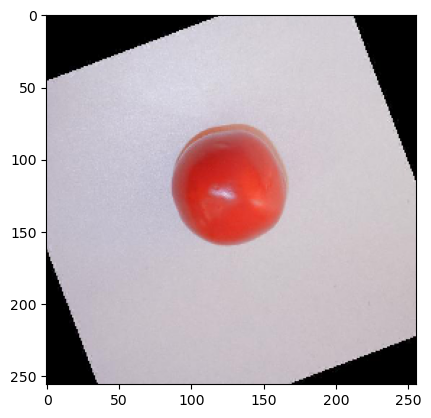

In [52]:
for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_name[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_name[np.argmax(batch_prediction[0])])
    
    break

1/1 [==============================] - 0s 22ms/step


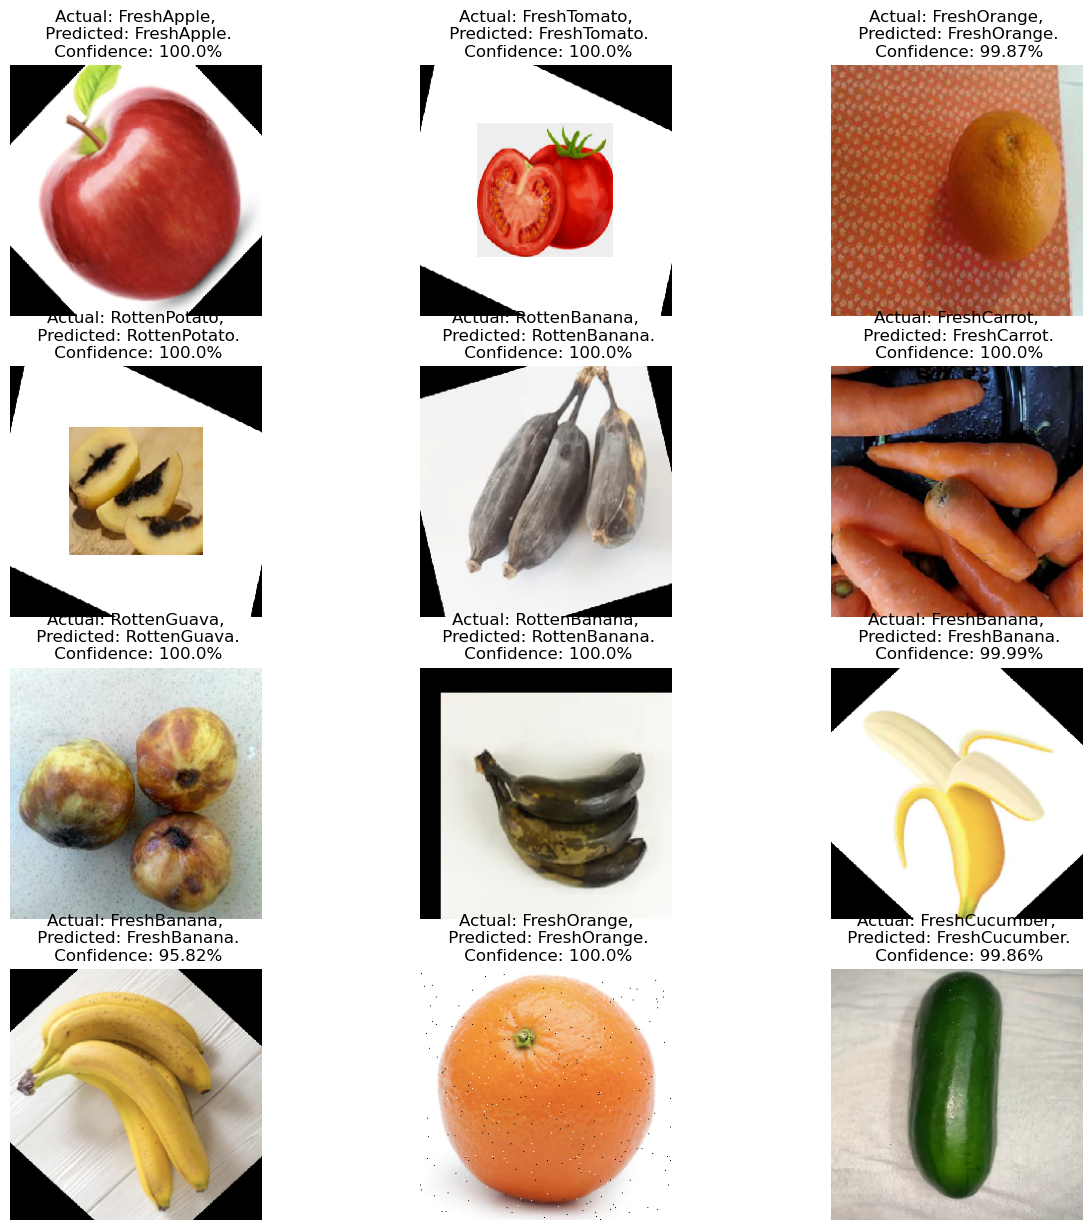

In [53]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(12):
        ax = plt.subplot(4, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_name[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [54]:
predictions = model.predict(test_generator)
predicted_classes = tf.argmax(predictions, axis=1)
true_classes = test_generator.classes

123/123 [==============================] - 50s 409ms/step


In [55]:
from sklearn.metrics import classification_report, confusion_matrix

In [57]:
predictions = model.predict(test_generator)
predicted_classes = tf.argmax(predictions, axis=1)
true_classes = test_generator.classes

123/123 [==============================] - 51s 412ms/step


In [58]:
class_name=list(train_generator.class_indices.keys())
class_name

['FreshApple',
 'FreshBanana',
 'FreshBellpepper',
 'FreshCapsicum',
 'FreshCarrot',
 'FreshCucumber',
 'FreshGuava',
 'FreshLime',
 'FreshOrange',
 'FreshPotato',
 'FreshTomato',
 'RottenApple',
 'RottenBanana',
 'RottenBellpepper',
 'RottenCapsicum',
 'RottenCarrot',
 'RottenCucumber',
 'RottenGuava',
 'RottenLime',
 'RottenOrange',
 'RottenPotato',
 'RottenTomato']

122/122 [==============================] - 51s 420ms/step
Confusion Matrix:
[[35 28  3 12  8 16  2  9 36  8 24 48 36  6 11  6  5 15  5 31 17 26]
 [32 23  6  9  4 11  4 11 24  4 14 42 36  3  9  8 12  8  3 23 11 23]
 [ 3  4  2  1  0  1  1  1  4  0  4  6  8  0  3  2  4  1  0  6  4  5]
 [ 6  6  1  1  3  2  2  3  9  2  9 15 10  1  4  1  1  3  0 10  2  8]
 [ 9  4  2  4  0  1  0  0  0  6  4  8  7  2  0  2  0  2  0  5  1  3]
 [ 6 15  1  1  5  5  0  7  6  1  8  6 15  1  4  1  3  3  1  9  4  7]
 [ 2  1  1  1  0  0  0  1  3  4  4  1  5  0  1  0  2  0  0  6  3  0]
 [11  9  2  0  2  0  0  4 10  3  3 22  8  2  3  5  2  3  1 10  4  5]
 [28 27  5  9  3  9  4  7 18  8 15 39 34  4  2  5  8  8  2 28 10 16]
 [12 10  0  2  0  2  0  2  7  6 11 16  9  2  3  0  2  5  0 10  7  8]
 [23 14  4  9  3  9  2  7 25  3 20 27 22  3  5  8  7  8  5 16 13 12]
 [64 48  8 15  6  8  5 20 31 10 20 55 51  4  9 11  9 14 10 45 14 29]
 [39 46  6 10  5 13  5  9 25 10 29 48 56  7  9  7 11 10  6 31 12 26]
 [ 5  2  1  3  1  3  0  2  

<Axes: >

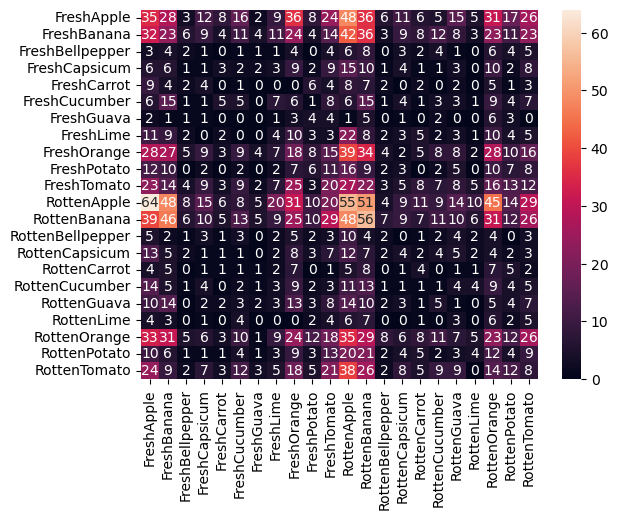

In [59]:
y_pred = model.predict(validation_generator)
y_true = validation_generator.classes
y_pred_labels = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_true, y_pred_labels)
print("Confusion Matrix:")
print(cm)
cr = classification_report(y_true, y_pred_labels, target_names=class_name)  # Assuming class_names_list is defined
print("Classification Report:")
print(cr)
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_name, yticklabels=class_name)

In [60]:
import matplotlib.pyplot as plt

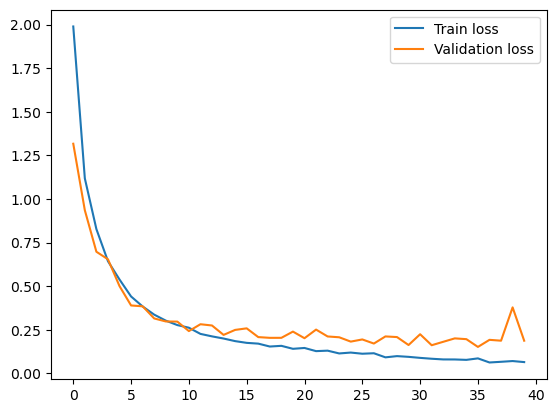

In [61]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

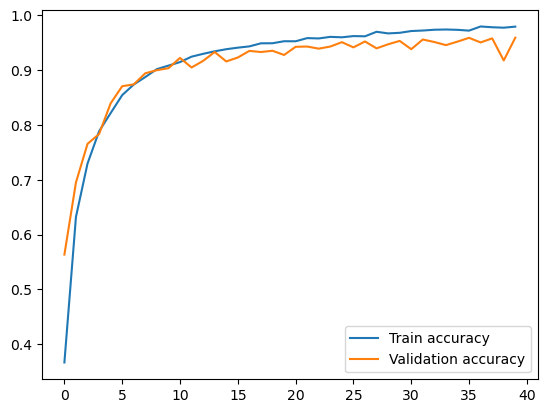

In [62]:
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()

In [63]:
scores = model.evaluate(test_generator)
scores

123/123 [==============================] - 51s 414ms/step - loss: 0.2322 - accuracy: 0.9481


[0.23222941160202026, 0.9480651617050171]

In [65]:
# Load the Keras model with custom objects
MODEL = tf.keras.models.load_model("./bestmodel.h5", compile=False)  # Avoid compiling the model

MODEL.compile(
    optimizer=Adam(learning_rate=0.001), 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
) 

# Converting the Keras model to the TensorFlow SavedModel format
tf.saved_model.save(MODEL, "cnn_new_model")

INFO:tensorflow:Assets written to: cnn_new_model/assets


INFO:tensorflow:Assets written to: cnn_new_model/assets
